In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Documents/Hamoye HQ/dataset_fuel_ferc1.csv")

In [3]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
data.loc[(data['fuel_qty_burned'].min())]

record_id                       f1_fuel_1994_12_1_0_10
utility_id_ferc1                                     1
report_year                                       1994
plant_name_ferc1                  rockport total plant
fuel_type_code_pudl                               coal
fuel_unit                                          ton
fuel_qty_burned                             10486945.0
fuel_mmbtu_per_unit                             16.592
fuel_cost_per_unit_burned                        18.58
fuel_cost_per_unit_delivered                     18.53
fuel_cost_per_mmbtu                               1.12
Name: 1, dtype: object

In [6]:
data1 = data['fuel_qty_burned'].kurt()

In [7]:
data1

651.3694501337732

In [8]:
data.isnull().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [9]:
data['fuel_unit'].isnull().sum()

180

In [10]:
data.shape

(29523, 11)

In [11]:
data['fuel_unit'].isnull().value_counts(normalize=True)

False    0.993903
True     0.006097
Name: fuel_unit, dtype: float64

In [12]:
data['fuel_unit']

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

<AxesSubplot:>

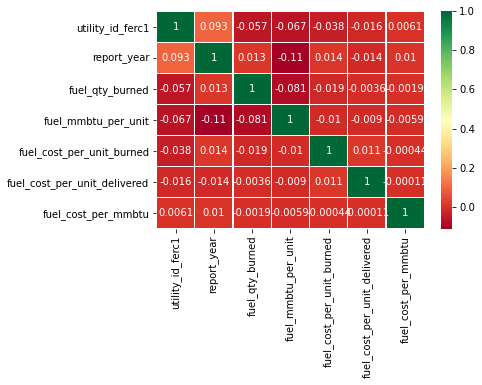

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(),linewidth=0.2,annot=True,cmap='RdYlGn')

In [14]:
data2 = data.groupby('fuel_type_code_pudl')

In [15]:
data2.get_group('coal')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.59000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.59200,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.13000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.95000,47.210,45.990,1.970
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.92200,44.240,43.250,1.850
...,...,...,...,...,...,...,...,...,...,...,...
29503,f1_fuel_2018_12_191_1_14,191,2018,lawrence,coal,ton,1761218.0,17.88832,26.775,27.392,1.497
29510,f1_fuel_2018_12_403_0_2,403,2018,wygen 2,coal,ton,569800.0,16.11000,14.760,0.810,1.130
29516,f1_fuel_2018_12_12_0_8,12,2018,neil simpson unit 2,coal,ton,491913.0,16.10000,14.760,17.720,1.100
29517,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.06800,13.690,14.310,0.890


In [16]:
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [17]:
data3 = data.groupby('report_year')

In [18]:
data.loc[(data['fuel_cost_per_unit_delivered'] == 796521),'report_year']

Series([], Name: report_year, dtype: int64)

In [ ]:
#fig = plt.gcf()
#fig.set_size_inches(10,8)
#plt.tight_layout()
sns.countplot(x = 'fuel_cost_per_unit_delivered',data=data,hue=data['report_year'])